In [8]:
import rpy2.interactive 
import rpy2.interactive.packages
%load_ext rpy2.ipython

# Directly convert objects from pandas to r and vsv
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Set the global figure size
plt.rcParams['figure.figsize'] = (8.0, 8.0)

import warnings
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
%%R
# Load R libaries
library(ggplot2)
library(dplyr)
library(gridExtra)

In this problem set, you'll continue to explore the diamonds data set.

## price vs. x

In [10]:
%%R
# Your first task is to create a
# scatterplot of price vs x.
# using the ggplot syntax.
data(diamonds)
str(diamonds)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


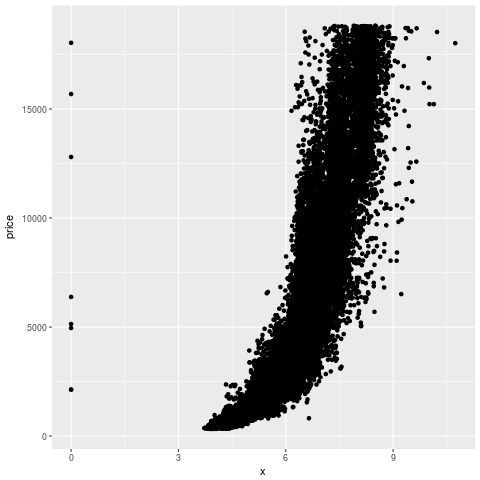

In [11]:
%%R
ggplot(aes(y=price, x=x), data = diamonds) + 
  geom_point()

In [13]:
diamonds = r.diamonds
diamonds.head()

R object with classes: ('tbl_df', 'tbl', 'data.frame') mapped to:
<DataFrame - Python:0x7f3798156948 / R:0x8049a78>
[Float..., Facto..., Facto..., ..., Float..., Float..., Float...]
  carat: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f379acf0f08 / R:0xb15e078>
[0.230000, 0.210000, 0.230000, 0.290000, 0.310000, 0.240000]
  cut: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('ordered', 'factor') mapped to:
<FactorVector - Python:0x7f379814a288 / R:0x804c6a0>
[       4,        3,        1,        3,        1,        2]
  color: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('ordered', 'factor') mapped to:
<FactorVector - Python:0x7f379814a048 / R:0x804dcc0>
[       1,        1,        1,        2,        3,        3]
  ...
  carat: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f379814a0c8 / R:0xb1

In [14]:
# Will have to convert the R object explicitily to a dataframe
diamonds = pandas2ri.ri2py_dataframe(r.diamonds)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75


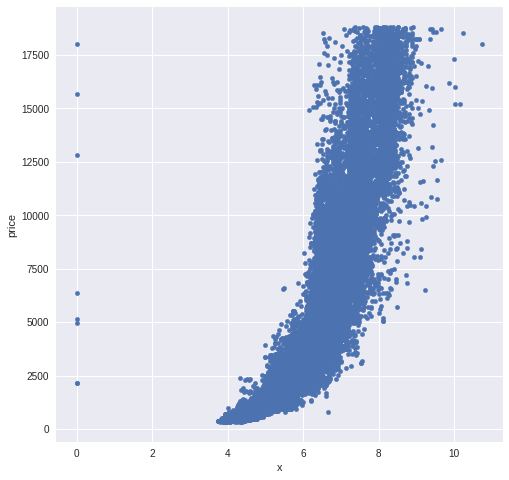

In [15]:
diamonds.plot.scatter(y= 'price', x ='x');

## Observations

- There seems to exist a strong positive correlation between rice and the x variable
- The number of observations seem to be positively correlated as well for both variables.

### From the Answer

- Outliers
- Exponential relationship!

## Correlations
Which are the correlations between price and x, y and z

### Checking to see how I can capture an use R output

In [8]:
%%capture a
%%R 
with(diamonds, cor.test(price, x))

In [9]:
a.outputs[0]

In [10]:
str(a)

''

In [11]:
a.stdout

''

In [12]:
a.show()


	Pearson's product-moment correlation

data:  price and x
t = 440.16, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8825835 0.8862594
sample estimates:
      cor 
0.8844352 



In [13]:
b = a.show()


	Pearson's product-moment correlation

data:  price and x
t = 440.16, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8825835 0.8862594
sample estimates:
      cor 
0.8844352 



In [14]:
type(b)

NoneType

In [15]:
%%capture b
a.show()

In [16]:
b.outputs

I can not get it with capture. Maybe if I rpy interface

In [17]:
a

In [18]:
%R a= with(diamonds, cor.test(price, y)) -o a

R object with classes: ('htest',) mapped to:
<ListVector - Python:0x7f9065456b08 / R:0x8e97a80>
[Float..., IntVe..., Float..., ..., StrVe..., StrVe..., Float...]
  statistic: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f9065969b88 / R:0xae906b8>
[401.141474]
  parameter: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x7f906591a8c8 / R:0xae90628>
[   53938]
  p.value: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f906591ad08 / R:0xae89528>
[0.000000]
  ...
  statistic: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7f906591ae48 / R:0x506aab8>
["Pearson's product-moment correlation"]
  parameter: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7f90

In [19]:
a.index

<function ListVector.index>

In [20]:
%%R
with(diamonds, cor.test(price, z))


	Pearson's product-moment correlation

data:  price and z
t = 393.6, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8590541 0.8634131
sample estimates:
      cor 
0.8612494 



In [21]:
# Ideal for a nice little python script

for variable in('x', 'y', 'z'):
    print('Correlation of Price with  {}: {:.3f}'.format(variable, diamonds.price.corr(diamonds[variable])))

Correlation of Price with  x: 0.884
Correlation of Price with  y: 0.865
Correlation of Price with  z: 0.861


## price vs. depth

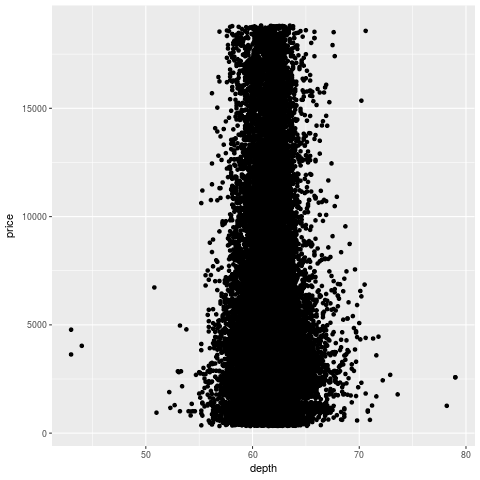

In [22]:
%%R
ggplot(aes(y=price, x=depth), data = diamonds) + 
  geom_point()

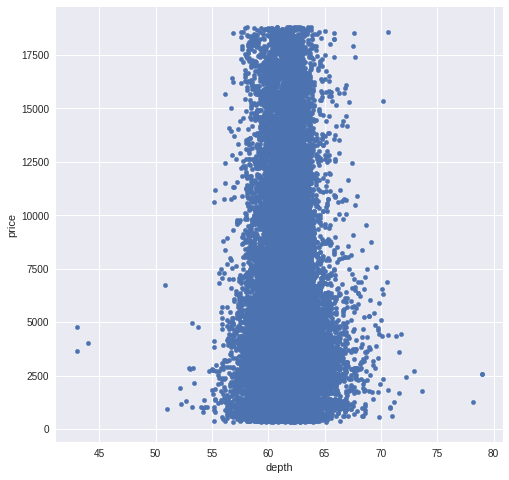

In [23]:
diamonds.plot.scatter(y= 'price', x ='depth');

## Adjustments - price vs. depth
Change the code to make the transparency of the
points to be 1/100 of what they are now and mark
the x-axis every 2 units. See the instructor notes
for two hints.

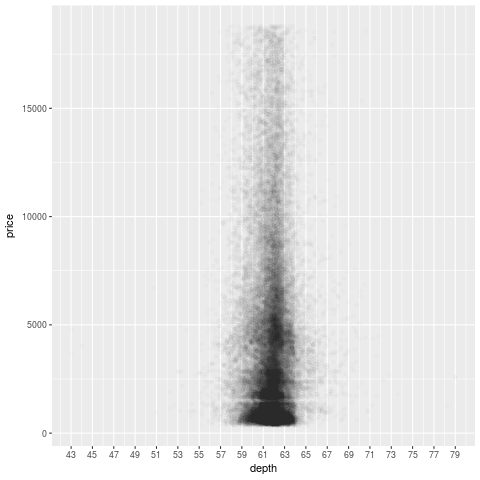

In [24]:
%%R
ggplot(aes(y=price, x=depth), data = diamonds) + 
  geom_point(alpha=1/100) +
  scale_x_continuous(breaks = seq(43,79,2))

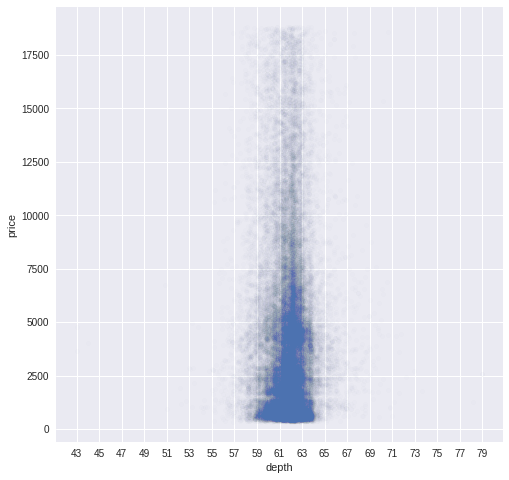

In [25]:
diamonds.plot.scatter(y= 'price', x ='depth', alpha=1/100)
# plt.xlim(43,79)
x=diamonds.depth
plt.xticks(np.arange(min(x), max(x)+1, 2.0));

## Typical Depth Range

Based on the scatterplot most diamonds are within what range?

Between 60 and 63

In [26]:
%%R
summary(diamonds$depth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  43.00   61.00   61.80   61.75   62.50   79.00 


In [27]:
diamonds.depth.describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

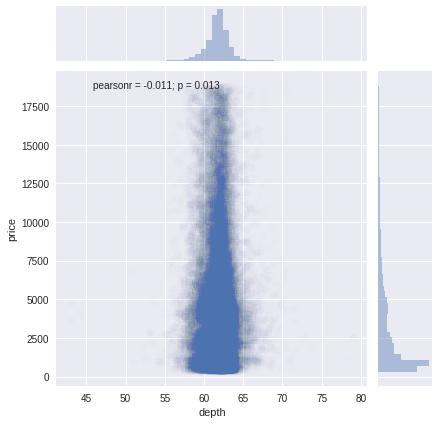

In [28]:
sns.jointplot(y= 'price', x ='depth', data=diamonds, alpha=1/100);

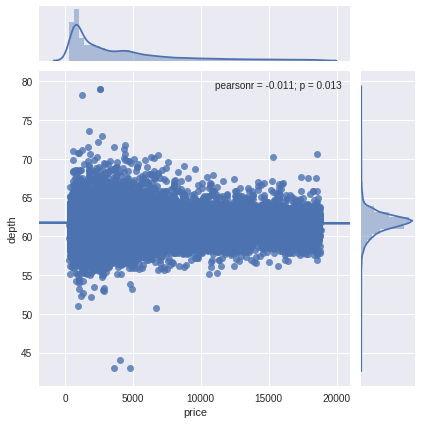

In [29]:
sns.jointplot(x= 'price', y ='depth', data=diamonds, kind='reg');

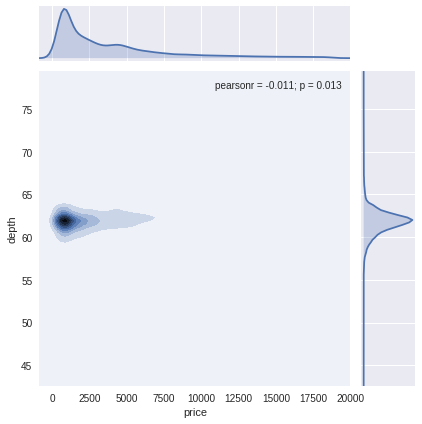

In [30]:
sns.jointplot(x= 'price', y ='depth', data=diamonds, kind='kde');

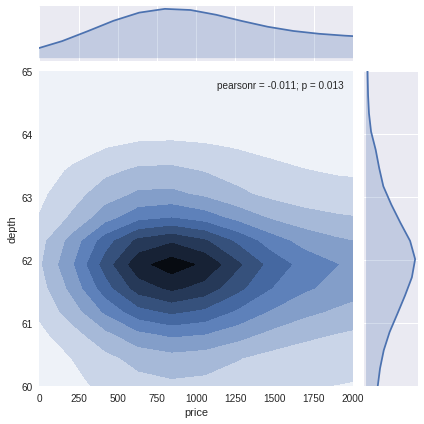

In [31]:
#Let's take a closer look
sns.jointplot(x= 'price', y ='depth', data=diamonds, kind='kde', xlim=(0,2000), ylim=(60,65));

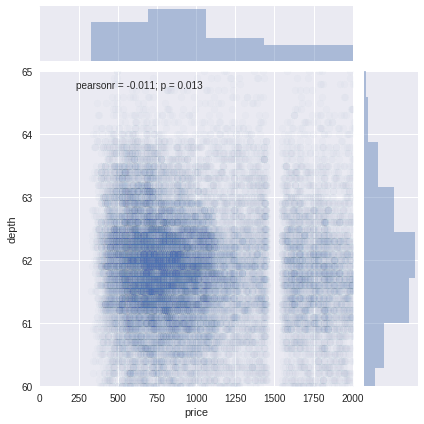

In [32]:
#Let's take a closer look
sns.jointplot(x= 'price', y ='depth', data=diamonds, kind='scatter', xlim=(0,2000), ylim=(60,65), alpha=1/50);

## price vs carat
Create a scatterplot of price vs carat
and omit the top 1% of price and carat
values.

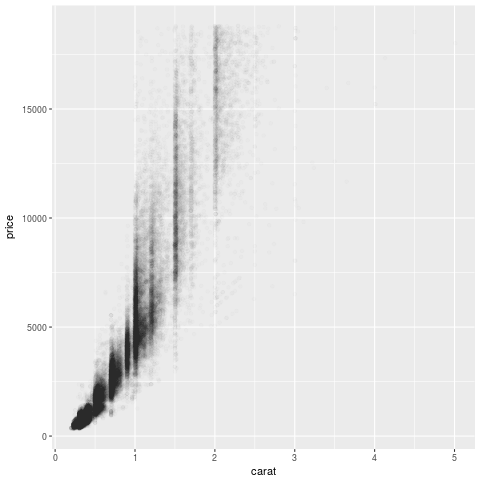

In [33]:
%%R
#First the plain one
ggplot(aes(x=carat, y=price), data = diamonds) + 
  geom_point(alpha=1/100)  
    #xlim(0, quantile(diamonds$carat, 0.90)) + 
    #ylim(0, quantile(diamonds$carat, 0.90)) 

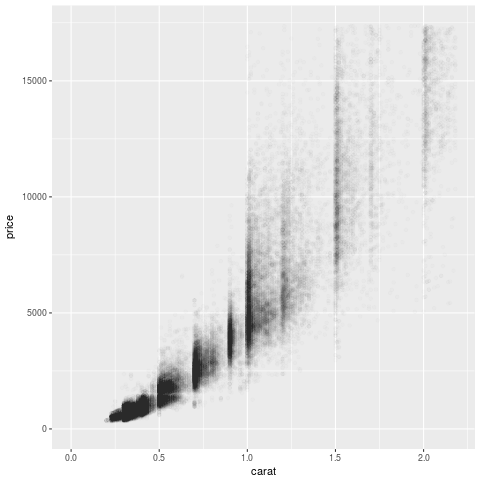

In [34]:
%%R
ggplot(aes(x=carat, y=price), data = diamonds) + 
  geom_point(alpha=1/100)  +
    xlim(0, quantile(diamonds$carat, 0.99)) + 
    ylim(0, quantile(diamonds$price, 0.99)) 

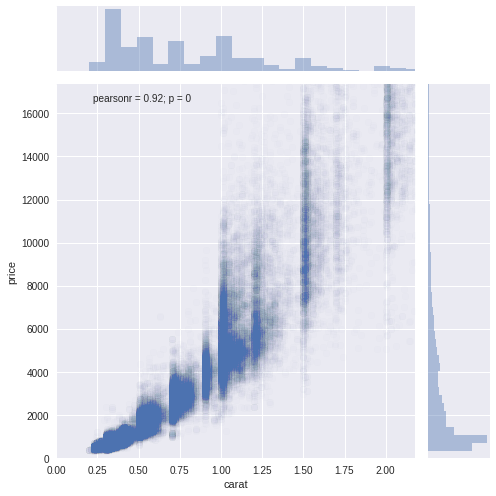

In [35]:
sns.jointplot(x= 'carat', y ='price', data=diamonds, kind='scatter',
              xlim=(0,diamonds.carat.quantile(.99)),
              ylim=(0,diamonds.price.quantile(.99)),
              alpha=1/100, size=7);

This is cool but I will try now to recreate the scatter plot without the marginal histograms and with a regression line

In [36]:
from scipy import stats

In [37]:
stats.pearsonr(diamonds.price, diamonds.carat)

(0.92159130119347676, 0.0)

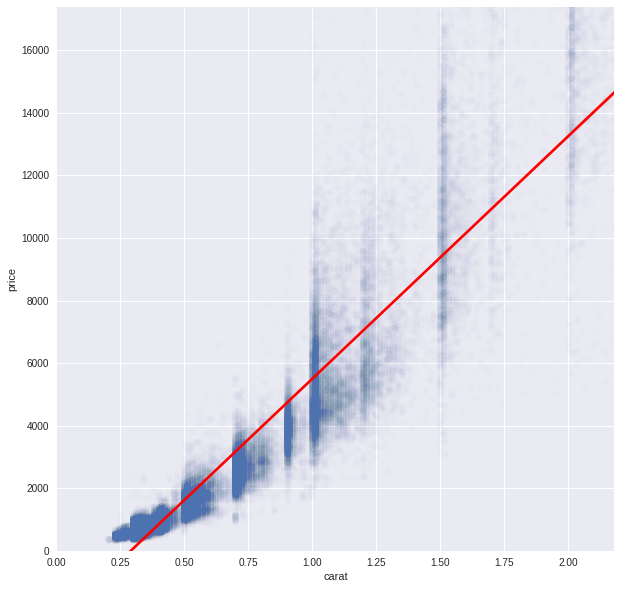

In [38]:
# This works butt dos not accept the pearson annotation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

g  = sns.regplot(x= 'carat', y ='price', data=diamonds, ax=ax,
                 scatter_kws={'alpha':1/100},
                 line_kws={'color':'red'})
g.set(xlim=(0,diamonds.carat.quantile(.99)),
      ylim=(0,diamonds.price.quantile(.99)));

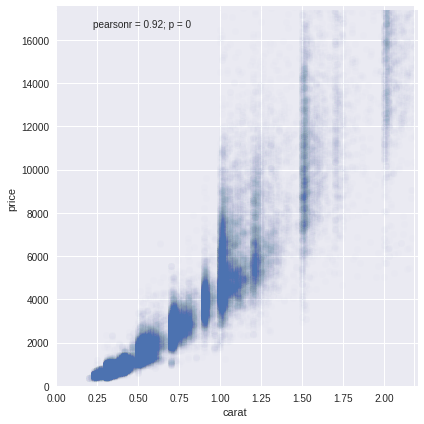

In [39]:
g = sns.JointGrid(x= 'carat', y ='price', data=diamonds, ratio=100,
                 xlim=(0,diamonds.carat.quantile(.99)),
                 ylim=(0,diamonds.price.quantile(.99)))
                 
g.plot_joint(sns.regplot,
             scatter_kws={'alpha':1/100},
             fit_reg=False)
g.annotate(stats.pearsonr);
# g.ax_marg_x.set_axis_off()
# g.ax_marg_y.set_axis_off()

##  price vs volume
Create a scatterplot of price vs. volume (x * y * z).
This is a very rough approximation for a diamond's volume.

Create a new variable for volume in the diamonds data frame.
This will be useful in a later exercise.

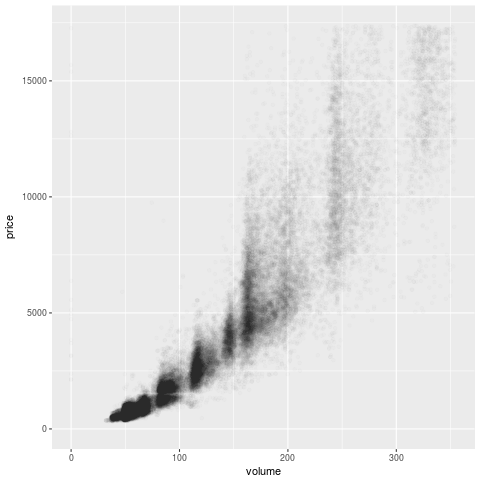

In [40]:
%%R
#create new variable
diamonds$volume <- diamonds$x * diamonds$y * diamonds$z

ggplot(aes(x=volume, y=price), data = diamonds) + 
  geom_point(alpha=1/100)  +
    xlim(0, quantile(diamonds$volume, 0.99)) + 
    ylim(0, quantile(diamonds$price, 0.99)) 

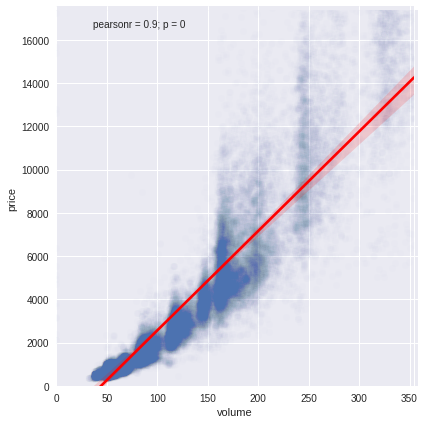

In [41]:
#let's get the update df from the r object ;)
diamonds = pandas2ri.ri2py_dataframe(r.diamonds)

g = sns.JointGrid(x= 'volume', y ='price', data=diamonds, ratio=100,
                 xlim=(0,diamonds.volume.quantile(.99)),
                 ylim=(0,diamonds.price.quantile(.99)))
                 
g.plot_joint(sns.regplot,
             scatter_kws={'alpha':1/100},
             line_kws={'color':'red'})
g.annotate(stats.pearsonr);

### Observations

- Strong positive correlation
- Most diamonds have a price below 8000 and volume below 200

## Outliers

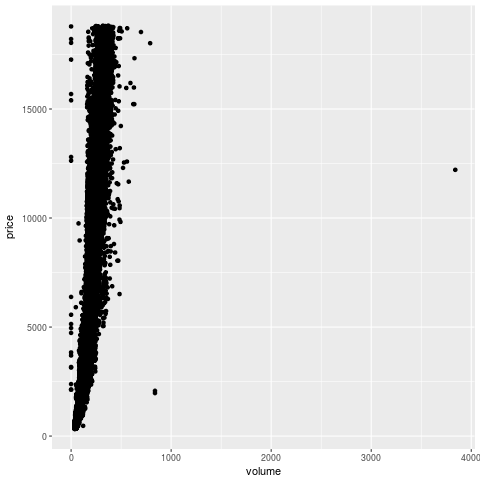

In [42]:
%%R
ggplot(aes(x=volume, y=price), data = diamonds) +
  geom_point()  

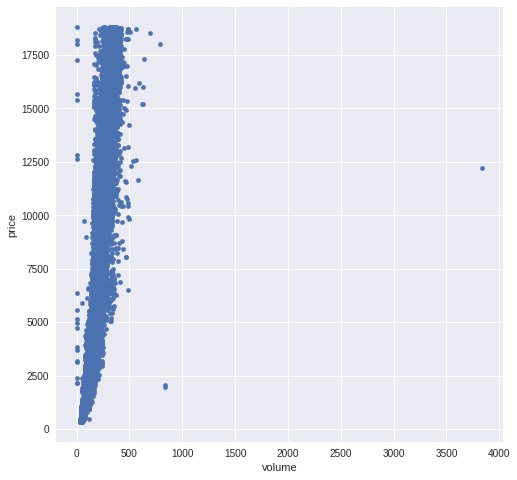

In [43]:
diamonds.plot.scatter(x ='volume', y= 'price');

In [44]:
# Number of outliers with zero volume
diamonds[diamonds.volume==0].index.value_counts().sum()

20

## Correlation price vs volume
Exclude diamonds with a volume o or greater than 800

In [45]:
%%R
with(subset(diamonds, (diamonds$volume!=0 & diamonds$volume<800)), cor.test(volume, price))


	Pearson's product-moment correlation

data:  volume and price
t = 559.19, df = 53915, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9222944 0.9247772
sample estimates:
      cor 
0.9235455 



In [46]:
diamonds_sub = diamonds[(diamonds.volume!=0)&( diamonds.volume<800)]
diamonds_sub.volume.corr(diamonds_sub.price)

0.92354550185956141

!!You need to set the limitations beforehand if you want to get the right pearson score

### Adjustments
Subset the data to exclude diamonds with a volume
greater than or equal to 800. Also, exclude diamonds
with a volume of 0. Adjust the transparency of the
points and add a linear model to the plot. (See the
Instructor Notes or look up the documentation of
geom_smooth() for more details about smoothers.)

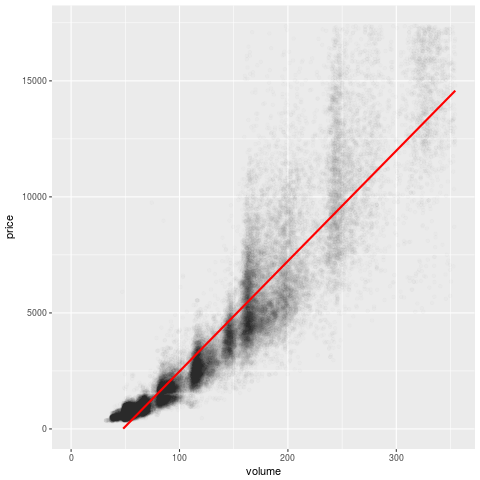

In [47]:
%%R
ggplot(aes(x=volume, y=price), data = subset(diamonds, (diamonds$volume!=0 & diamonds$volume<800)))+
         geom_point(alpha=1/100)  +
  geom_smooth(method = 'lm', color = 'red') + 
    xlim(0, quantile(diamonds$volume, 0.99)) + 
    ylim(0, quantile(diamonds$price, 0.99)) 

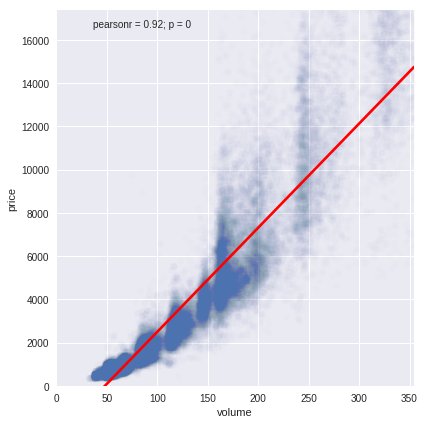

In [48]:
#Let's see how that looks in our graph
g = sns.JointGrid(x= 'volume', y ='price', data=diamonds_sub, ratio=100,
                  xlim=(0,diamonds.volume.quantile(.99)),
                  ylim=(0,diamonds.price.quantile(.99)))
                 
g.plot_joint(sns.regplot,
             scatter_kws={'alpha':1/100},
             line_kws={'color':'red'})
g.annotate(stats.pearsonr)
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off();

## Mean price by clarity

  Use the function dplyr package
  to create a new data frame containing
  info on diamonds by clarity.

  Name the data frame diamondsByClarity

  The data frame should contain the following
  variables in this order.

        (1) mean_price
        (2) median_price
        (3) min_price
        (4) max_price
        (5) n

  where n is the number of diamonds in each
  level of clarity.

In [49]:
%%R
diamondsByClarity_grouped <- group_by(diamonds, clarity)

diamondsByClarity <- summarise(diamondsByClarity_grouped,
                               mean_price = mean(price),
                               median_price = median(price),
                               min_price = min(price),
                               max_price = max(price),
                               n = n())

head(diamondsByClarity)

# A tibble: 6 × 6
  clarity mean_price median_price min_price max_price     n
    <ord>      <dbl>        <dbl>     <int>     <int> <int>
1      I1   3924.169         3344       345     18531   741
2     SI2   5063.029         4072       326     18804  9194
3     SI1   3996.001         2822       326     18818 13065
4     VS2   3924.989         2054       334     18823 12258
5     VS1   3839.455         2005       327     18795  8171
6    VVS2   3283.737         1311       336     18768  5066


In [50]:
#Pandas
diamondsByClarity_grouped = diamonds.groupby('clarity')

diamondsByClarity = diamondsByClarity_grouped.price.aggregate([np.mean, np.median, np.min, np.max, len])

diamondsByClarity.head()

,mean,median,amin,amax,len
clarity,,,,,
1,3924.168691,3344,345,18531,741
2,5063.028606,4072,326,18804,9194
3,3996.001148,2822,326,18818,13065
4,3924.989395,2054,334,18823,12258
5,3839.455391,2005,327,18795,8171


## Bar Charts of Mean Price

  We’ve created summary data frames with the mean price
  by clarity and color. You can run the code in R to
  verify what data is in the variables diamonds_mp_by_clarity
  and diamonds_mp_by_color.

  Your task is to write additional code to create two bar plots
  on one output image using the grid.arrange() function from the package
  gridExtra.

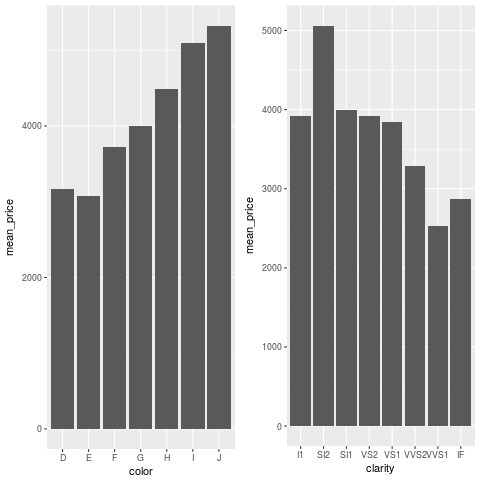

In [ ]:
%%R
diamonds_by_clarity <- group_by(diamonds, clarity)
diamonds_mp_by_clarity <- summarise(diamonds_by_clarity, mean_price = mean(price))

diamonds_by_color <- group_by(diamonds, color)
diamonds_mp_by_color <- summarise(diamonds_by_color, mean_price = mean(price))



p1 <- ggplot(aes(x=color, y=mean_price), data = diamonds_mp_by_color) + 
      geom_bar(stat = 'identity')
p2 <- ggplot(aes(x=clarity, y=mean_price), data = diamonds_mp_by_clarity) + 
  geom_bar(stat = 'identity')
grid.arrange(p1,p2, ncol=2)

In [17]:
diamonds_by_clarity = diamonds.groupby('clarity')
diamonds_mp_by_clarity = diamonds_by_clarity.aggregate(np.mean)

diamonds_by_color = diamonds.groupby('color')
diamonds_mp_by_color = diamonds_by_color.aggregate(np.mean)

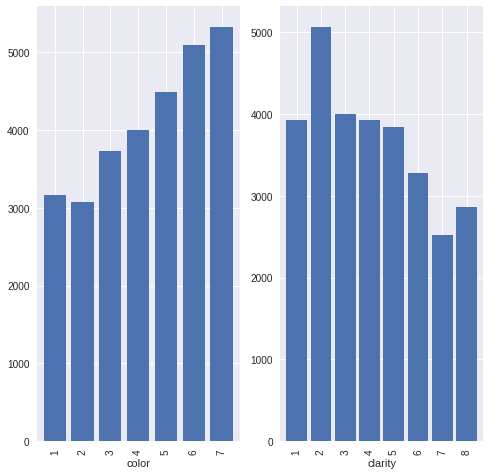

In [26]:
fig, axes = plt.subplots(1,2)

diamonds_mp_by_color.price.plot(kind='bar',width=0.8, ax=axes[0])
diamonds_mp_by_clarity.price.plot(kind='bar',width=0.85, ax=axes[1]);

### What do you notice in each of the bar charts?

1. The have an opposite trend - mean_price rises with the color and it decreases with clarity
2. Clarity of 2 breaks the trend and has very high price